In [1]:
import time
import random
import matplotlib.pyplot as plt


def mst_bsearch():
    ranges = [10, 100, 1000, 10000, 100000, 1000000]
    results = []

    for r in ranges:
        total_time = 0
        iterations = 100
        
        for _ in range(iterations):
            x = random.randint(0, r)
            start_time = time.time()
            floor_sqrt_binary_search(x)
            total_time += time.time() - start_time
        
        average_time = total_time / iterations
        results.append((r, average_time))
    
    return results


def mt_btiles():
    ranges = [10, 100, 1000, 10000, 100000, 1000000]
    results = []

    for r in ranges:
        total_time = 0
        iterations = 100
        
        for _ in range(iterations):
            N = random.randint(1, r)
            M = random.randint(1, r)
            start_time = time.time()
            count_broken_tiles(N, M)
            total_time += time.time() - start_time
        
        average_time = total_time / iterations
        results.append((r, average_time))
    
    return results


In [2]:
def floor_sqrt_binary_search(x):
    if x < 0:
        raise ValueError("Квадратный корень определён только для неотрицательных чисел.")
    if x == 0 or x == 1:
        return x 
    # Бинарный поиск
    left, right = 0, x
    result = 0  

    while left <= right:
        mid = (left + right) // 2
        square = mid * mid

        if square == x:
            return mid 
        elif square < x:
            result = mid 
            left = mid + 1
        else:
            right = mid - 1

    return result 

# Пример использования:
x = 50
print(f"Округленный вниз квадратный корень {x}: {floor_sqrt_binary_search(x)}")


Округленный вниз квадратный корень 50: 7


In [3]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def count_broken_tiles(N, M):
    return N + M - gcd(N, M)

# Пример использования:
N, M = 10, 6
print(f"Количество испорченных плиток для {N}x{M}: {count_broken_tiles(N, M)}")


Количество испорченных плиток для 10x6: 14


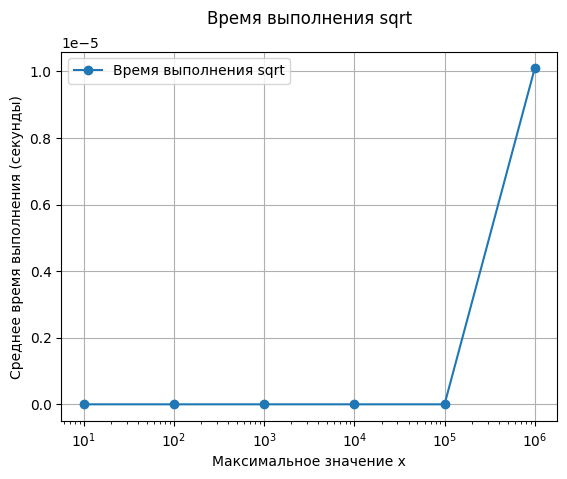

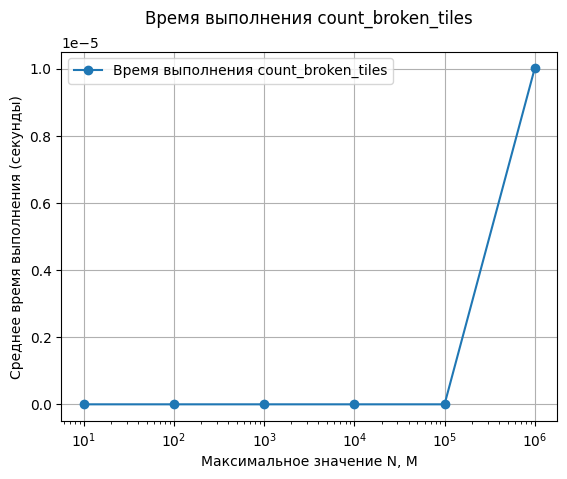

In [4]:
def plot_results(results, title, xlabel, ylabel):
    sizes, times = zip(*results)
    plt.plot(sizes, times, marker="o", label=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, loc="center", pad=20)
    plt.xscale("log")
    plt.grid(True)
    plt.legend()
    plt.show()


binary_search_results = mst_bsearch()
broken_tiles_results = mt_btiles()

plot_results(binary_search_results, "Время выполнения sqrt", "Максимальное значение x", "Среднее время выполнения (секунды)")
plot_results(broken_tiles_results, "Время выполнения count_broken_tiles", "Максимальное значение N, M", "Среднее время выполнения (секунды)")
